In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # this is used for the plot the graph 
import seaborn as sns # used for plot interactive graph.
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import average_precision_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import precision_recall_curve
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import roc_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from sklearn.svm import SVC
%matplotlib inline

In [2]:
heart = pd.read_csv("C:/Users/Delmafia91/Downloads/heart.csv")

In [3]:
heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
heart.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [5]:
# I am going to change the names for clarity
"""heart.columns = ['age', 'sex', 'chestpain', 'bp', 'chol', 'bs',
                'rest_ecg', 'max_hr', 'exerinduced_angina',
                 'depres', 'slope', 'majorvess', 'thalassemia',
                 'target']

# I am also going to change the values of the categorical variable
heart['sex'][heart['sex'] == 0] = 'female'
heart['sex'][heart['sex'] == 1] = 'male'
heart['chestpain'][heart['chestpain'] == 1] = 'typical angina'
heart['chestpain'][heart['chestpain'] == 2] = 'atypical angina'
heart['chestpain'][heart['chestpain'] == 3] = 'non-atypical angina'
heart['chestpain'][heart['chestpain'] == 4] = 'asymptomatic'

heart['bp'][heart['bp'] == 0] = '<= 120mg/ml'
heart['bp'][heart['bp'] == 1] = '> 120mg/ml'

heart['rest_ecg'][heart['rest_ecg'] == 0] = 'normal'
heart['rest_ecg'][heart['rest_ecg'] == 1] = 'ST-T wave abnormal'
heart['rest_ecg'][heart['rest_ecg'] == 2] = 'left ventricular hypertrophy'

heart['exerinduced_angina'][heart['exerinduced_angina'] == 0] = 'no'
heart['exerinduced_angina'][heart['exerinduced_angina'] == 1] = 'yes'

heart['slope'][heart['slope'] ==1] = 'unsloping'
heart['slope'][heart['slope'] ==2] = 'flat'
heart['slope'][heart['slope'] ==3] = 'downsloping'

heart['thalassemia'][heart['thalassemia'] ==1] = 'normal'
heart['thalassemia'][heart['thalassemia'] ==2] = 'fixed defect'
heart['thalassemia'][heart['thalassemia'] ==3] = 'reversable defect'"""

"heart.columns = ['age', 'sex', 'chestpain', 'bp', 'chol', 'bs',\n                'rest_ecg', 'max_hr', 'exerinduced_angina',\n                 'depres', 'slope', 'majorvess', 'thalassemia',\n                 'target']\n\n# I am also going to change the values of the categorical variable\nheart['sex'][heart['sex'] == 0] = 'female'\nheart['sex'][heart['sex'] == 1] = 'male'\nheart['chestpain'][heart['chestpain'] == 1] = 'typical angina'\nheart['chestpain'][heart['chestpain'] == 2] = 'atypical angina'\nheart['chestpain'][heart['chestpain'] == 3] = 'non-atypical angina'\nheart['chestpain'][heart['chestpain'] == 4] = 'asymptomatic'\n\nheart['bp'][heart['bp'] == 0] = '<= 120mg/ml'\nheart['bp'][heart['bp'] == 1] = '> 120mg/ml'\n\nheart['rest_ecg'][heart['rest_ecg'] == 0] = 'normal'\nheart['rest_ecg'][heart['rest_ecg'] == 1] = 'ST-T wave abnormal'\nheart['rest_ecg'][heart['rest_ecg'] == 2] = 'left ventricular hypertrophy'\n\nheart['exerinduced_angina'][heart['exerinduced_angina'] == 0] = 'no'\

In [6]:
heart.shape

(303, 14)

In [7]:
heart.target.value_counts()

1    165
0    138
Name: target, dtype: int64

In [8]:
"""heart['sex'] = heart['sex'].astype('object')
heart['chestpain'] = heart['chestpain'].astype('object')
heart['bs'] = heart['bs'].astype('object')
heart['rest_ecg'] = heart['rest_ecg'].astype('object')
heart['exerinduced_angina'] = heart['exerinduced_angina'].astype('object')
heart['slope'] = heart['slope'].astype('object')
heart['thalassemia'] = heart['thalassemia'].astype('object')"""

"heart['sex'] = heart['sex'].astype('object')\nheart['chestpain'] = heart['chestpain'].astype('object')\nheart['bs'] = heart['bs'].astype('object')\nheart['rest_ecg'] = heart['rest_ecg'].astype('object')\nheart['exerinduced_angina'] = heart['exerinduced_angina'].astype('object')\nheart['slope'] = heart['slope'].astype('object')\nheart['thalassemia'] = heart['thalassemia'].astype('object')"

In [9]:
heart.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [10]:
heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [11]:
#heart = pd.get_dummies(heart, drop_first = True) 

Let us start with the model

In [12]:
#X_train, X_test, y_train, y_test = train_test_split(heart.drop('target', 1), heart['target'], test_size = .2, random_state = 10)

In [13]:
#m_heart = RandomForestClassifier(max_depth= 5)
#m_heart.fit(X_train, y_train)

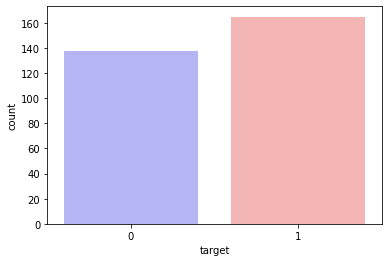

In [14]:
sns.countplot(x = "target", data = heart, palette = "bwr")
plt.show()

In [15]:
countnodise = len(heart[heart.target == 0])
countwithdise = len(heart[heart.target == 1])
print("Percentage of Patients Haven't Heart Disease: {:.2f}%".format((
countnodise / (len(heart.target))*100)))
print("Percentage of Patients have heart disease: {:.2f}%".format((
countwithdise / (len(heart.target))*100)))

Percentage of Patients Haven't Heart Disease: 45.54%
Percentage of Patients have heart disease: 54.46%


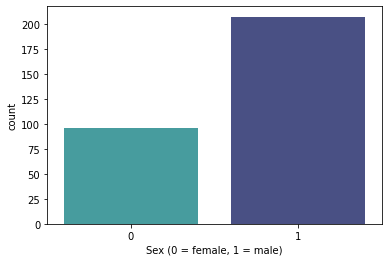

In [16]:
sns.countplot(x='sex', data = heart, palette = "mako_r")
plt.xlabel("Sex (0 = female, 1 = male)")
plt.show()

In [17]:
countfemale = len(heart[heart.sex == 0])
countmale = len(heart[heart.sex == 1])
print("Percentage of female patients: {:.2f}".format((countfemale
        / (len(heart.sex))*100)))
print("Percentage of male patients: {:.2f}".format((countmale
        / (len(heart.sex))*100)))

Percentage of female patients: 31.68
Percentage of male patients: 68.32


In [18]:
heart.groupby('target').mean()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
target,,,,,,,,,,,,,
0,56.601449,0.826087,0.478261,134.398551,251.086957,0.159420,0.449275,139.101449,0.550725,1.585507,1.166667,1.166667,2.543478
1,52.496970,0.563636,1.375758,129.303030,242.230303,0.139394,0.593939,158.466667,0.139394,0.583030,1.593939,0.363636,2.121212


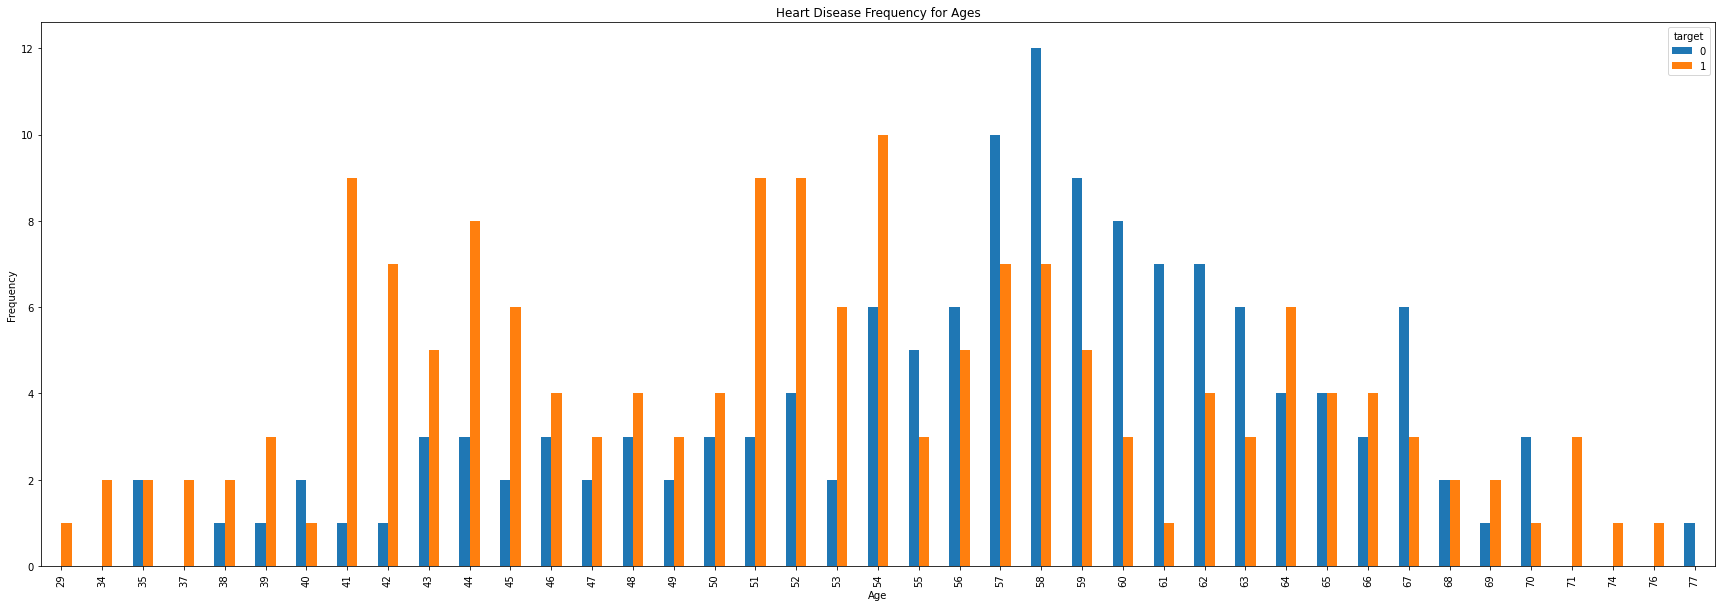

In [19]:
pd.crosstab(heart.age, heart.target).plot(kind = "bar", figsize = 
                                         (30, 10))
plt.title('Heart Disease Frequency for Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.savefig('heart disease and ages.png')
plt.show()

C:\Users\Delmafia91\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Legend does not support 'N' instances.
A proxy artist may be used instead.
See: https://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  import sys
C:\Users\Delmafia91\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Legend does not support 'o' instances.
A proxy artist may be used instead.
See: https://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  import sys
C:\Users\Delmafia91\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Legend does not support ' ' instances.
A proxy artist may be used instead.
See: https://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  import sys
C:\Users\Delmafia91\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Legend does not s

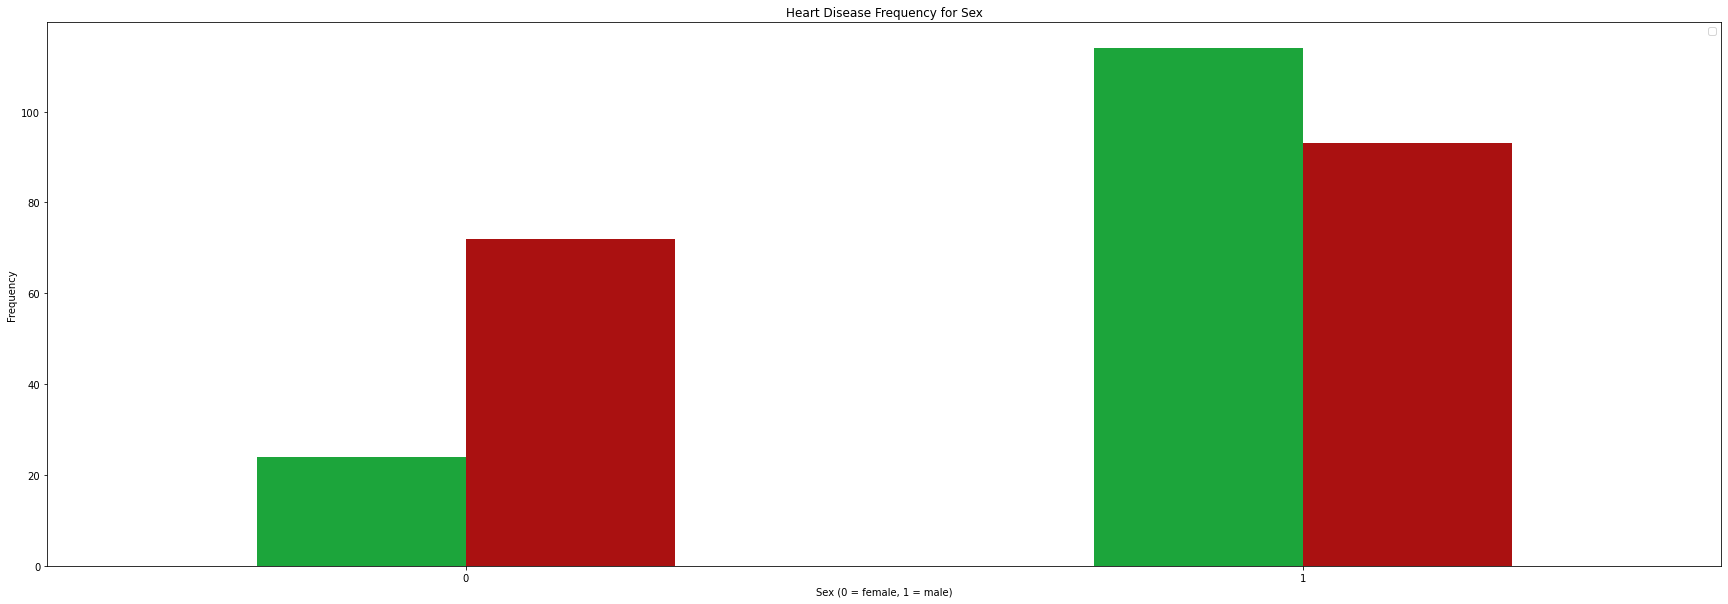

In [20]:
pd.crosstab(heart.sex, heart.target).plot(kind = "bar", figsize = 
                (30, 10), color = ['#1CA53B', '#AA1111'])
plt.title('Heart Disease Frequency for Sex')
plt.xlabel('Sex (0 = female, 1 = male)')
plt.xticks(rotation = 0)
plt.ylabel('Frequency')
plt.legend("No disease", "Disease")
plt.show()

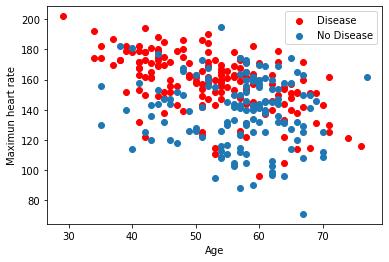

In [21]:
plt.scatter(x=heart.age[heart.target == 1], y=heart.thalach[(heart.target == 1)], c = "red")
plt.scatter(x = heart.age[heart.target == 0], y = heart.thalach[
    (heart.target == 0)])
plt.legend(["Disease", "No Disease"])
plt.xlabel("Age")
plt.ylabel("Maximun heart rate")
plt.show()

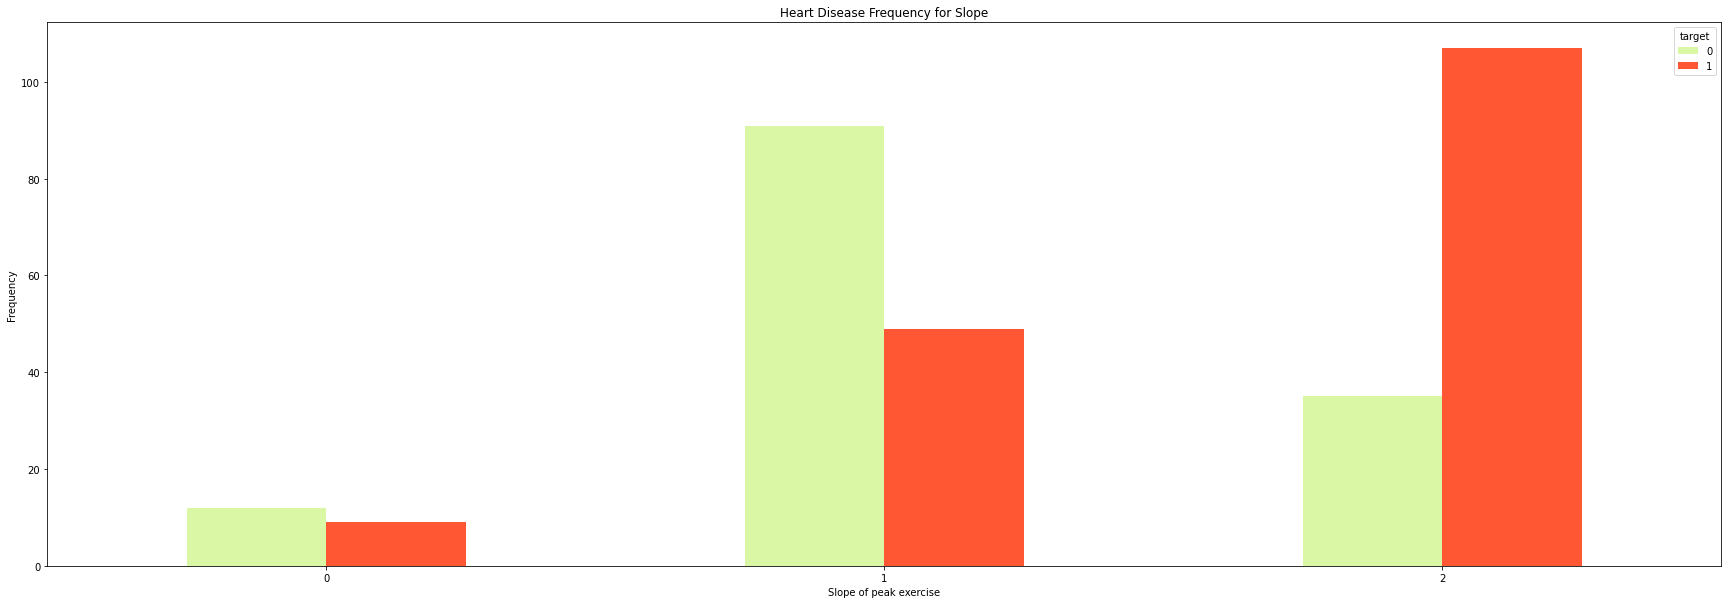

In [22]:
pd.crosstab(heart.slope, heart.target).plot(kind = "bar",
        figsize = (30, 10), color = ['#DAF7A6', '#FF5733'])
plt.title('Heart Disease Frequency for Slope')
plt.xlabel('Slope of peak exercise')
plt.ylabel('Frequency')
plt.xticks(rotation = 0)
plt.show()

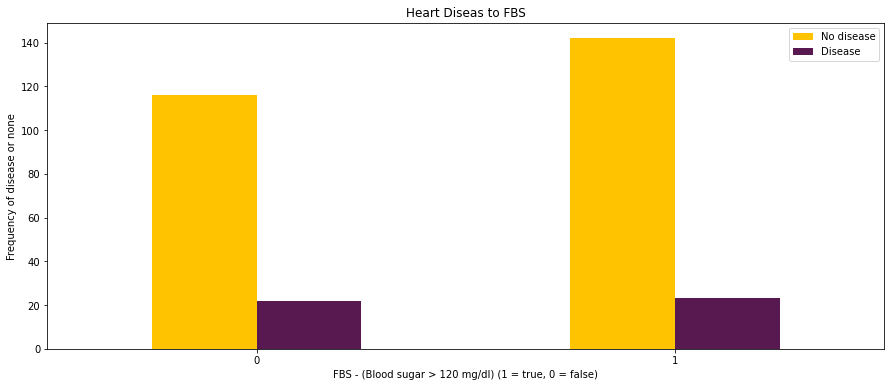

In [23]:
pd.crosstab(heart.target, heart.fbs).plot(kind = "bar", 
            figsize = (15, 6), color = ['#FFC300', '#581950'])
plt.title('Heart Diseas to FBS')
plt.xlabel('FBS - (Blood sugar > 120 mg/dl) (1 = true, 0 = false)')
plt.xticks(rotation = 0)
plt.legend(["No disease", "Disease"])
plt.ylabel('Frequency of disease or none')
plt.show()

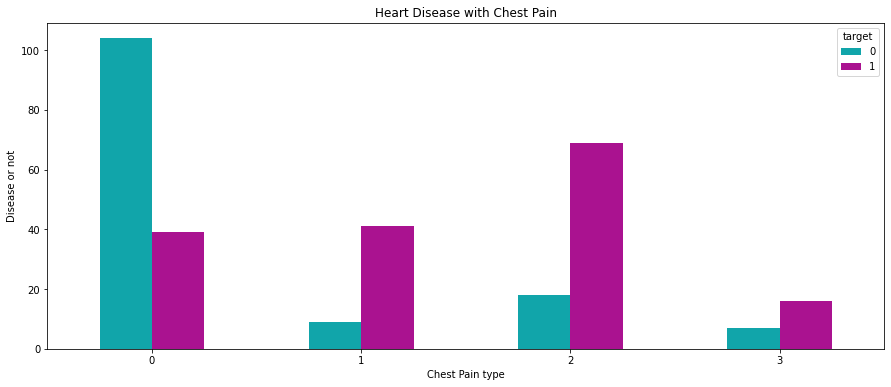

In [24]:
pd.crosstab(heart.cp, heart.target).plot(kind = "bar",
            figsize = (15,6), color = ['#11A5AA', '#AA1290'])
plt.title("Heart Disease with Chest Pain")
plt.xlabel('Chest Pain type')
plt.ylabel('Disease or not')
plt.xticks(rotation = 0)
plt.show()

In [25]:
cp = pd.get_dummies(heart['cp'], prefix = "cp")
thal = pd.get_dummies(heart['thal'], prefix = "thal")
slope = pd.get_dummies(heart['slope'], prefix = "slope")

In [26]:
frames = [heart, cp, thal, slope]
heart = pd.concat(frames, axis = 1)
heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,...,cp_1,cp_2,cp_3,thal_0,thal_1,thal_2,thal_3,slope_0,slope_1,slope_2
0,63,1,3,145,233,1,0,150,0,2.3,...,0,0,1,0,1,0,0,1,0,0
1,37,1,2,130,250,0,1,187,0,3.5,...,0,1,0,0,0,1,0,1,0,0
2,41,0,1,130,204,0,0,172,0,1.4,...,1,0,0,0,0,1,0,0,0,1
3,56,1,1,120,236,0,1,178,0,0.8,...,1,0,0,0,0,1,0,0,0,1
4,57,0,0,120,354,0,1,163,1,0.6,...,0,0,0,0,0,1,0,0,0,1


In [27]:
heart = heart.drop(columns = ['cp', 'thal', 'slope'])
heart.head()

,age,sex,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,ca,...,cp_1,cp_2,cp_3,thal_0,thal_1,thal_2,thal_3,slope_0,slope_1,slope_2
0,63,1,145,233,1,0,150,0,2.3,0,...,0,0,1,0,1,0,0,1,0,0
1,37,1,130,250,0,1,187,0,3.5,0,...,0,1,0,0,0,1,0,1,0,0
2,41,0,130,204,0,0,172,0,1.4,0,...,1,0,0,0,0,1,0,0,0,1
3,56,1,120,236,0,1,178,0,0.8,0,...,1,0,0,0,0,1,0,0,0,1
4,57,0,120,354,0,1,163,1,0.6,0,...,0,0,0,0,0,1,0,0,0,1


# Creating a model for Logistic Regression
Sometimes it is good to use the sklearn libraries or better yet write our own functions.

In [28]:
y = heart.target.values
x_data = heart.drop(['target'], axis = 1)

In [29]:
# Normalize
x = (x_data - np.min(x_data)) / (np.max(x_data) - np.min(x_data)).values

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
X_train, x_test, Y_train, y_test = train_test_split(x, y, test_size = .2, random_state = 50)

In [32]:
x_train = X_train.T; y_train = Y_train.T;
x_test = x_test.T; y_test = y_test.T

In [33]:
def initial(dimension):
    weight = np.full((dimension, 1), 0.01)
    bias = 0.0
    return weight, bias

# Sigmoid function
Also used for Gradient Descent

In [34]:
def sigmoid(z):
    
    y_head = 1/(1+ np.exp(-z))
    return y_head

def initial(dimension):
    
    weight = np.full((dimension,1),0.01)
    bias = 0.0
    return weight,bias

In [35]:
def forwardBackward(weight,bias,x_train,y_train):
    # Forward
    
    y_head = sigmoid(np.dot(weight.T,x_train) + bias)
    loss = -(y_train*np.log(y_head) + (1-y_train)*np.log(1-y_head))
    cost = np.sum(loss) / x_train.shape[1]
    
    # Backward
    derivative_weight = np.dot(x_train,((y_head-y_train).T))/x_train.shape[1]
    derivative_bias = np.sum(y_head-y_train)/x_train.shape[1]
    gradients = {"Derivative Weight" : derivative_weight, "Derivative Bias" : derivative_bias}
    
    return cost,gradients

In [36]:
def update(weight,bias,x_train,y_train,learningRate,iteration) :
    costList = []
    index = []
    
    #for each iteration, update weight and bias values
    for i in range(iteration):
        cost,gradients = forwardBackward(weight,bias,x_train,y_train)
        weight = weight - learningRate * gradients["Derivative Weight"]
        bias = bias - learningRate * gradients["Derivative Bias"]
        
        costList.append(cost)
        index.append(i)

    parameters = {"weight": weight,"bias": bias}
    
    print("iteration:",iteration)
    print("cost:",cost)

    plt.plot(index,costList)
    plt.xlabel("Number of Iteration")
    plt.ylabel("Cost")
    plt.show()

    return parameters, gradients

In [37]:
def predict(weight,bias,x_test):
    z = np.dot(weight.T,x_test) + bias
    y_head = sigmoid(z)

    y_pred = np.zeros((1,x_test.shape[1]))
    
    for i in range(y_head.shape[1]):
        if y_head[0,i] <= 0.5:
            y_pred[0,i] = 0
        else:
            y_pred[0,i] = 1
    return y_pred

In [38]:
def logistic_regression(x_train,y_train,x_test,y_test,learningRate,iteration):
    dimension = x_train.shape[0]
    weight,bias = initial(dimension)
    
    parameters, gradients = update(weight,bias,x_train,y_train,learningRate,iteration)

    y_prediction = predict(parameters["weight"],parameters["bias"],x_test)
    
    print("Manuel Test Accuracy: {:.2f}%".format((100 - np.mean(np.abs(y_prediction - y_test))*100)))

iteration: 100
cost: 0.3368095179739847


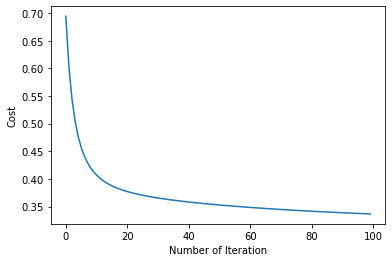

Manuel Test Accuracy: 77.05%


In [39]:
logistic_regression(x_train,y_train,x_test,y_test,1,100)


# Accuracy with Scikit-learn Logistic Regression


In [40]:
accu = {}

logr = LogisticRegression()
logr.fit(x_train.T, y_train.T)
acc = logr.score(x_test.T, y_test.T) * 100

accu['Logistic Regression'] = acc
print("Test Accuracy {:.2f}".format(acc))

Test Accuracy 77.05


C:\Users\Delmafia91\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


# KNN Classification

In [41]:
knn = KNeighborsClassifier(n_neighbors = 2)
knn.fit(x_train.T, y_train.T)
pred = knn.predict(x_test.T)

print("{} KNN score: {:.2f}".format(2, knn.score(x_test.T, y_test.T) * 100))

2 KNN score: 67.21


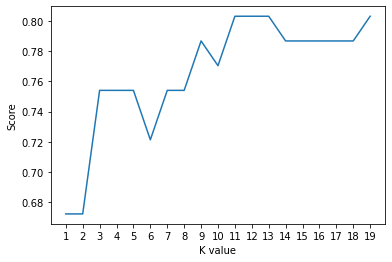

Maximum KNN score is 80.33%


In [42]:
scorelist = []
for i in range(1, 20):
    knn2 = KNeighborsClassifier(n_neighbors= i)
    knn2.fit(x_train.T, y_train.T)
    scorelist.append(knn2.score(x_test.T, y_test.T))
    
plt.plot(range(1,20), scorelist)
plt.xticks(np.arange(1, 20, 1))
plt.xlabel("K value")
plt.ylabel("Score")
plt.show()

acc = max(scorelist) * 100
accu['KNN'] = acc
print("Maximum KNN score is {:.2f}%".format(acc))

# Support Vector Machine Algorithm

In [43]:
svm = SVC(random_state = 1)
svm.fit(x_train.T, y_train.T)
acc = svm.score(x_test.T, y_test.T) * 100
accu['SVM'] = acc
print("SVM algorithm: {:.2f}%".format(acc))


SVM algorithm: 80.33%


C:\Users\Delmafia91\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


# Naive Bayes Algorithm

In [44]:
nb = GaussianNB()
nb.fit(x_train.T, y_train.T)

acc = nb.score(x_test.T, y_test.T) * 100
accu['Naive Bayes'] = acc
print("Accuracy of Naive Bayes: {:.2f}%".format(acc))


Accuracy of Naive Bayes: 78.69%


# Decision Tree Algorithm

In [45]:
dtc = DecisionTreeClassifier()
dtc.fit(x_train.T, y_train.T)

acc = dtc.score(x_test.T, y_test.T) * 100
accu['Decision Tree'] = acc
print("Decision Tree: {:.2f}%".format(acc))

Decision Tree: 73.77%


# Random Forest Algorithm

In [46]:
rf = RandomForestClassifier(n_estimators = 1500, random_state=1)
rf.fit(x_train.T, y_train.T)

acc = rf.score(x_test.T, y_test.T) * 100
accu["Random Forest"] = acc
print("Random Forest: {:.2f}%".format(acc))


Random Forest: 77.05%


# Comparing Algorithms

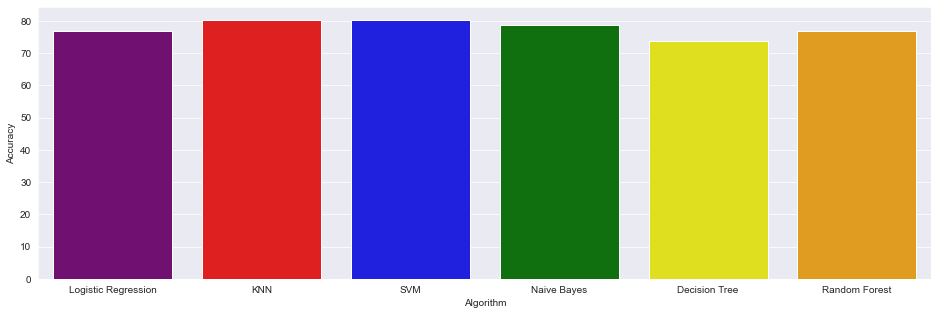

In [47]:
color = ["purple", "red", "blue", "green", "yellow", "orange"]
sns.set_style("darkgrid")
plt.figure(figsize = (16, 5))
plt.yticks(np.arange(0, 100, 10))
plt.ylabel("Accuracy")
plt.xlabel("Algorithm")
sns.barplot(x = list(accu.keys()), 
            y = list(accu.values()), palette = color)
plt.show()

# Confusion Matrix

In [59]:
y_headlr = logr.predict(x_test.T)
knn1 = KNeighborsClassifier(n_neighbors=3)
knn1.fit(x_train.T, y_train.T)
y_headknn = knn1.predict(x_test.T)
y_headsvm = svm.predict(x_test.T)
y_headnb = nb.predict(x_test.T)
y_headdtc = dtc.predict(x_test.T)
y_headrf = rf.predict(x_test.T)

In [60]:
cflr = confusion_matrix(y_test, y_headlr)
cfknn = confusion_matrix(y_test, y_headknn)
cfsvm = confusion_matrix(y_test, y_headsvm)
cfnb = confusion_matrix(y_test, y_headnb)
cfdtc = confusion_matrix(y_test, y_headdtc)
cfrf = confusion_matrix(y_test, y_headrf)

<AxesSubplot:title={'center':'Random Forest of Confusion Matrix'}>

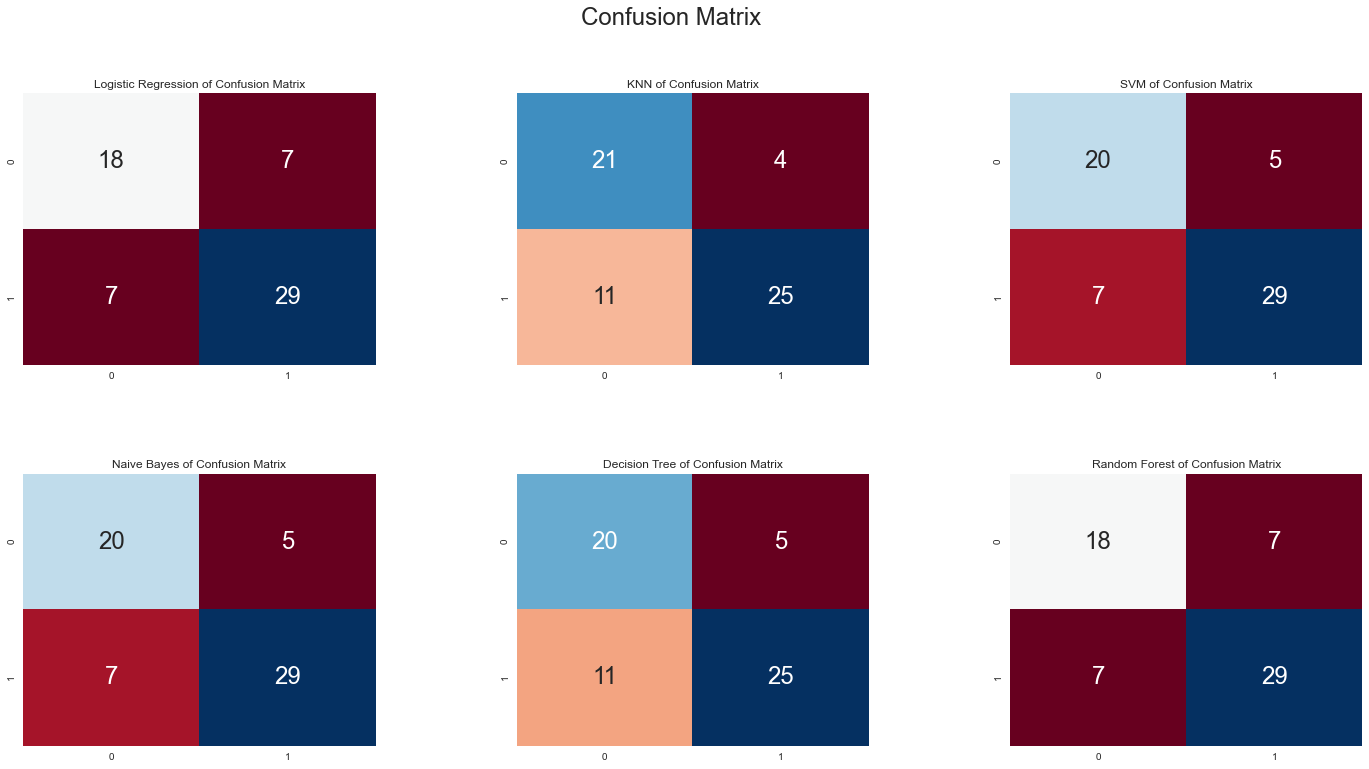

In [62]:
plt.figure(figsize = (24, 12))

plt.suptitle("Confusion Matrix", fontsize = 24)
plt.subplots_adjust(wspace=0.4, hspace=0.4)

plt.subplot(2, 3, 1)
plt.title("Logistic Regression of Confusion Matrix")
sns.heatmap(cflr, annot=True, cmap="RdBu", fmt="d", cbar=False,
           annot_kws={"size": 24})

plt.subplot(2, 3, 2)
plt.title("KNN of Confusion Matrix")
sns.heatmap(cfknn, annot=True, cmap="RdBu", fmt="d", cbar=False,
           annot_kws={"size": 24})

plt.subplot(2, 3, 3)
plt.title("SVM of Confusion Matrix")
sns.heatmap(cfsvm, annot=True, cmap="RdBu", fmt="d", cbar=False,
           annot_kws={"size": 24})

plt.subplot(2, 3, 4)
plt.title("Naive Bayes of Confusion Matrix")
sns.heatmap(cfsvm, annot=True, cmap="RdBu", fmt="d", cbar=False,
           annot_kws={"size": 24})

plt.subplot(2, 3, 5)
plt.title("Decision Tree of Confusion Matrix")
sns.heatmap(cfdtc, annot=True, cmap="RdBu", fmt="d", cbar=False,
           annot_kws={"size": 24})

plt.subplot(2, 3, 6)
plt.title("Random Forest of Confusion Matrix")
sns.heatmap(cfrf, annot=True, cmap="RdBu", fmt="d", cbar=False,
           annot_kws={"size": 24})
